# Import the necessary packages

In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import the dataset

In [2]:
file = 'sx-stackoverflow.txt'
data = pd.read_csv(file, sep=" ", header=None, names='source_id target_id timestamp'.split())

In [3]:
data.head()

source_id  target_id   timestamp
0          9          8  1217567877
1          1          1  1217573801
2         13          1  1217606247
3         17          1  1217617639
4         48          2  1217618182

In [4]:
data.shape

(63497050, 3)

# Split the dataset into equal time periods

In [5]:
# Find the duration by subtrack the last timestamp with the first
DT = data['timestamp'].iloc[63497049] - data['timestamp'].iloc[0]
DT

239705551

In [6]:
# Division of time with a specific time pediod depending on user's preferance
dt = DT // 700000
dt

342

In [7]:
sub_graphs = []

# Make equal lists consisted of connections
for i in range(len(data)):
    sub_graphs.append(i*dt)

In [8]:
print(f"Start point of 1st sub graph: {sub_graphs[0]}\
\nStart point of 2nd sub graph: {sub_graphs[1]}\nStart point of 3rd sub graph: {sub_graphs[2]}")

Start point of 1st sub graph: 0
Start point of 2nd sub graph: 342
Start point of 3rd sub graph: 684


# Workig with gruphs

In [9]:
# Convert the first list to graph

G1 = nx.from_pandas_edgelist(data.iloc[:sub_graphs[1]], 'source_id', 'target_id', ['timestamp'])

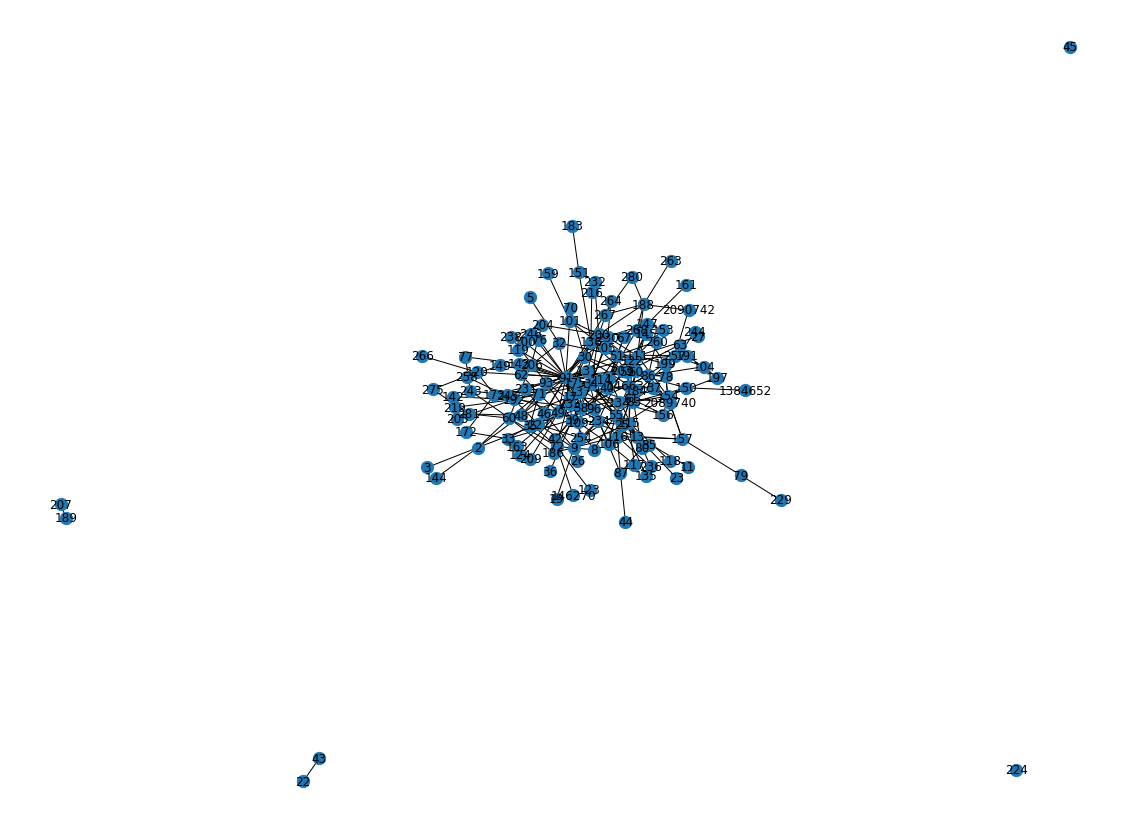

In [10]:
pos = nx.spring_layout(G1)
plt.figure(figsize=(20,15))
plt.axis('off')
nx.draw_networkx(G1, pos=pos, node_size=150)

In [11]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 145
Number of edges: 310
Average degree:   4.2759


In [15]:
# Remove the self loops from the edges

G1.remove_edges_from(nx.selfloop_edges(G1))

In [16]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 145
Number of edges: 280
Average degree:   3.8621


In [20]:
G1.edges.data()

EdgeDataView([(9, 8, {'timestamp': 1217567877}), (9, 19, {'timestamp': 1217618357}), (9, 72, {'timestamp': 1217638074}), (9, 115, {'timestamp': 1217682410}), (9, 227, {'timestamp': 1217817055}), (9, 234, {'timestamp': 1217821233}), (9, 46, {'timestamp': 1217873474}), (8, 55, {'timestamp': 1217623986}), (8, 39, {'timestamp': 1217625808}), (1, 13, {'timestamp': 1217606247}), (1, 17, {'timestamp': 1217618239}), (1, 91, {'timestamp': 1217652372}), (1, 233, {'timestamp': 1217849462}), (1, 67, {'timestamp': 1217862281}), (1, 268, {'timestamp': 1217883446}), (13, 23, {'timestamp': 1217623216}), (13, 11, {'timestamp': 1217618799}), (13, 49, {'timestamp': 1217623079}), (13, 157, {'timestamp': 1217726572}), (13, 25, {'timestamp': 1217755970}), (13, 85, {'timestamp': 1217847892}), (13, 55, {'timestamp': 1217856543}), (13, 236, {'timestamp': 1217869815}), (17, 32, {'timestamp': 1217621272}), (17, 72, {'timestamp': 1217629962}), (17, 48, {'timestamp': 1217638448}), (17, 83, {'timestamp': 1217639296

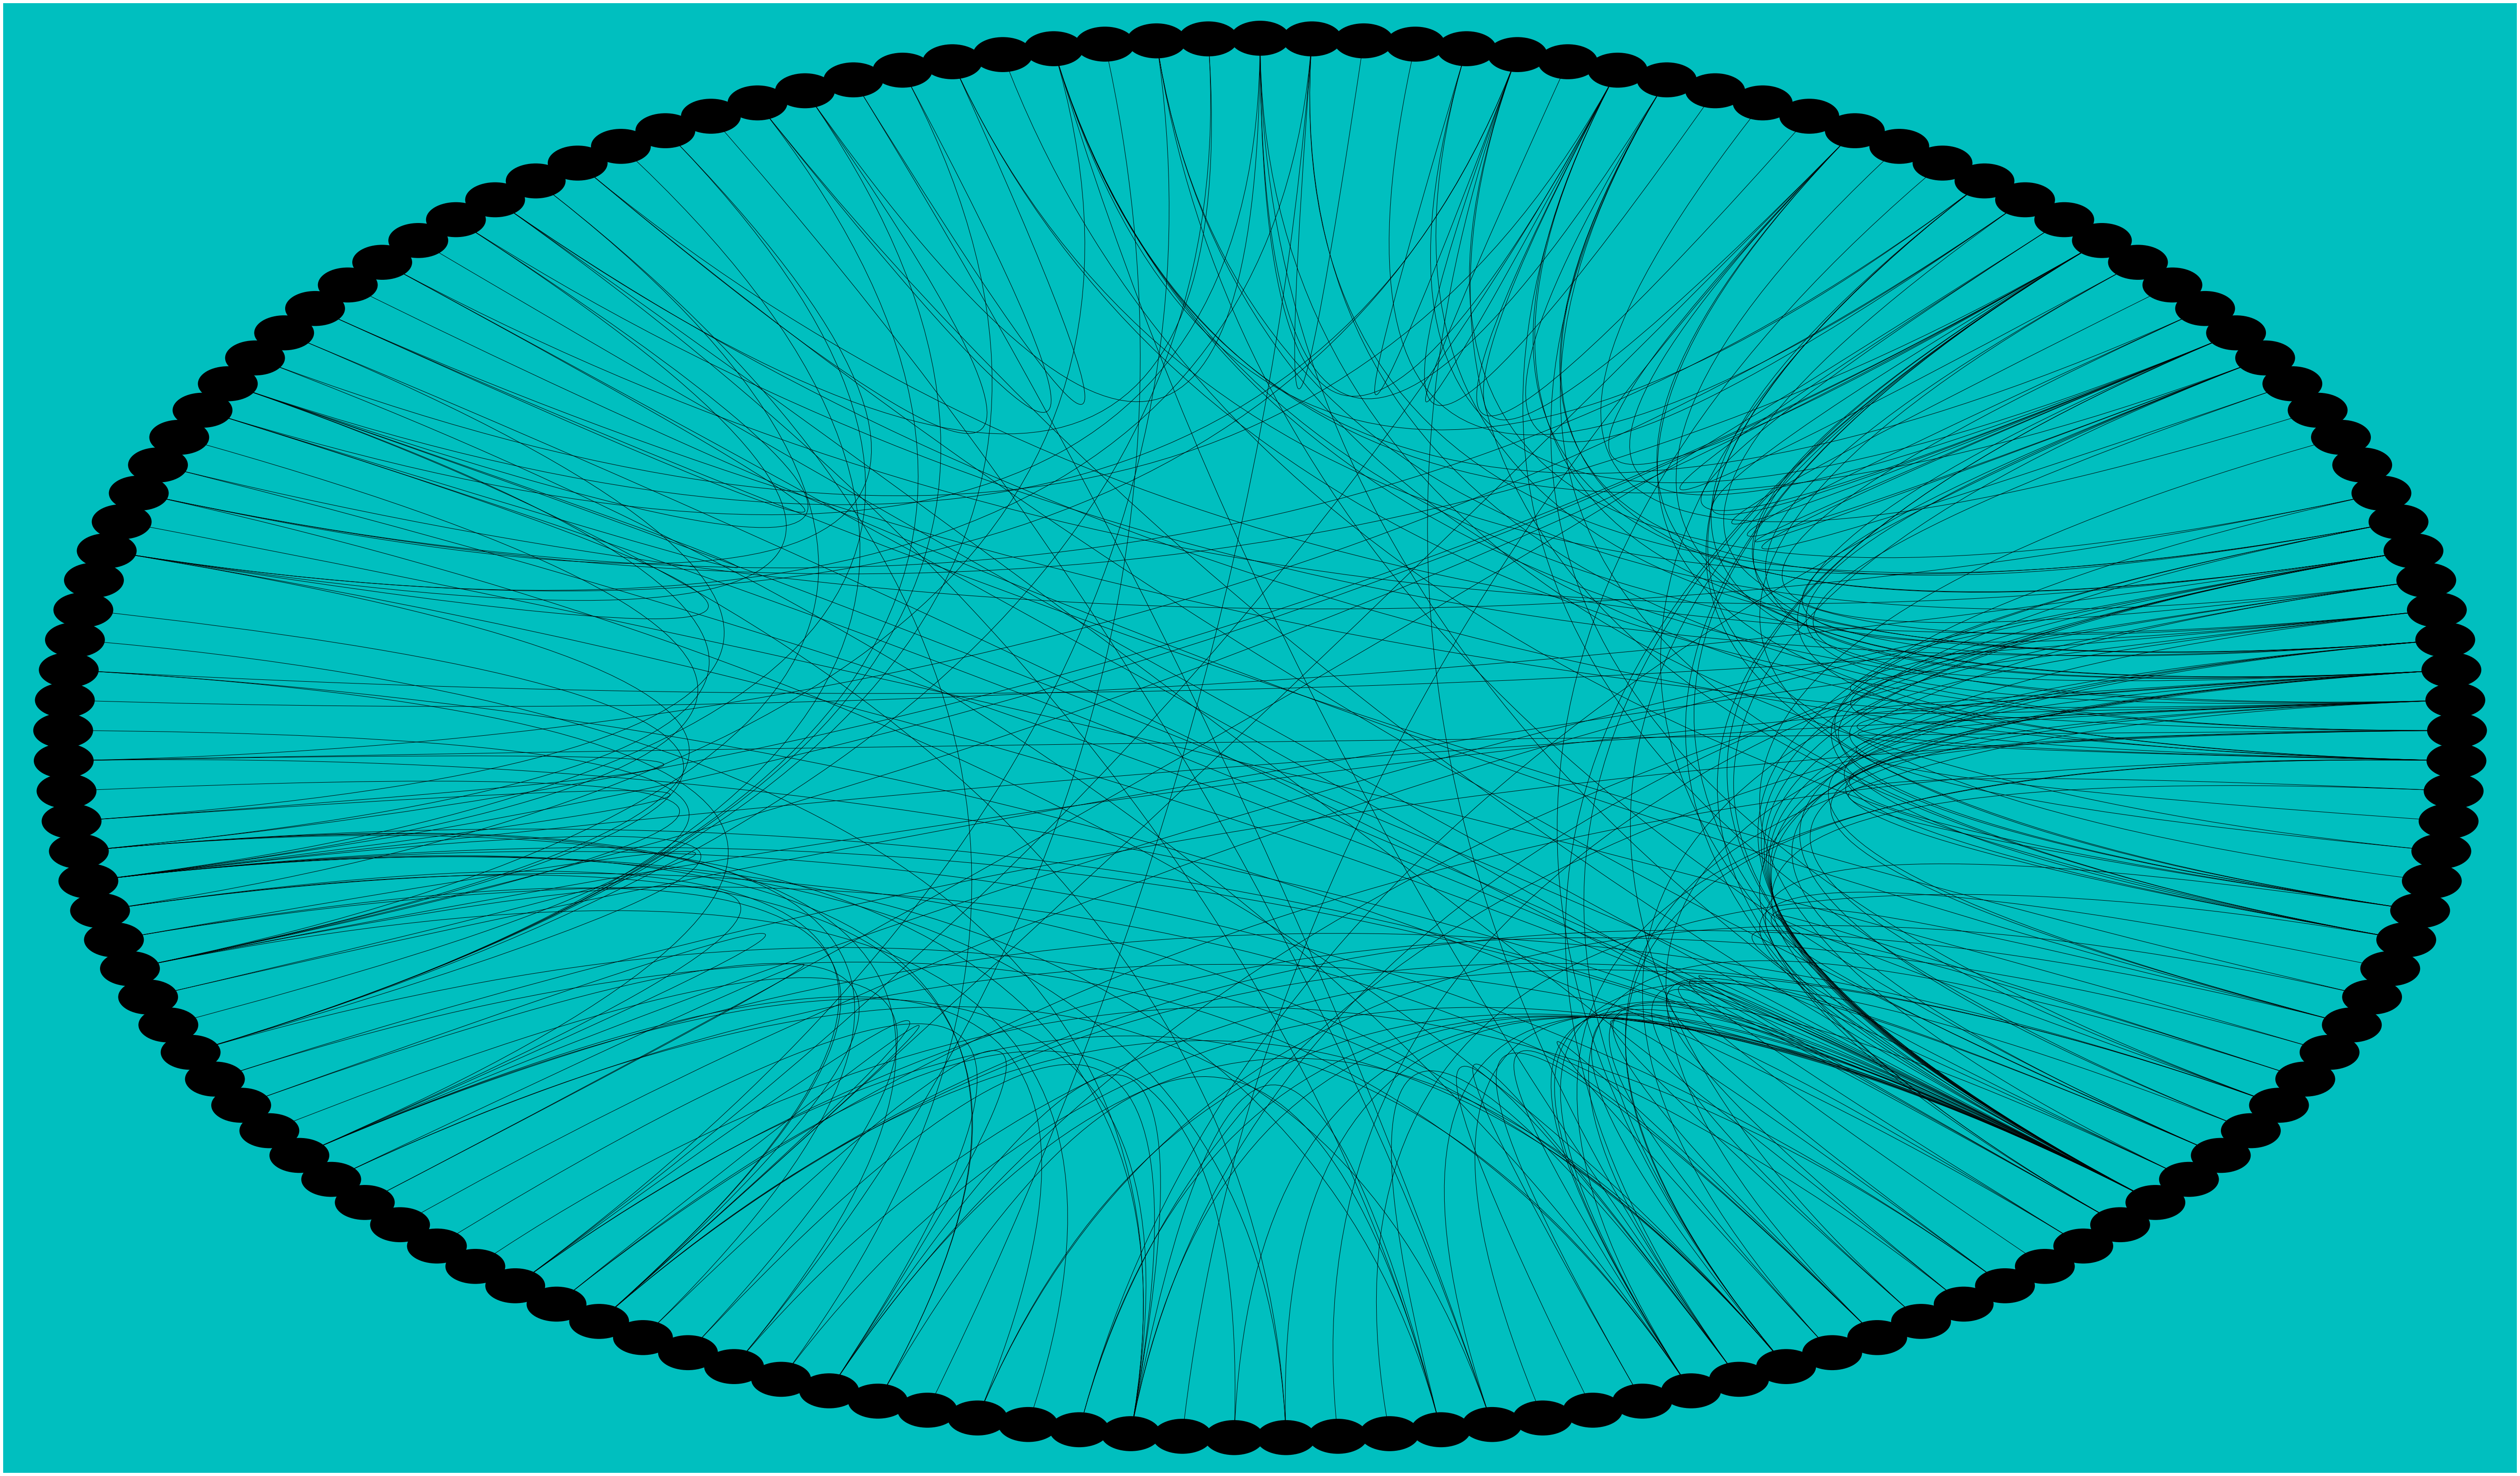

<Figure size 576x576 with 0 Axes>

In [23]:
# Another way to plot the graph
from circos import CircosPlot

fig = plt.figure(figsize=(100,60))
ax = fig.add_subplot(111, facecolor='c')

nodes = sorted(G1.nodes)
edges = G1.edges()

c = CircosPlot(nodes, edges, radius=10, nodecolor='black', ax=ax, figsize=(8,8))
c.draw()

In [27]:
# Find who is the node down right of the plot with the most edges

sorted(G1.degree, key=lambda x: x[1], reverse=True)[:10]

[(91, 39),
 (58, 13),
 (34, 13),
 (49, 11),
 (59, 11),
 (200, 11),
 (39, 10),
 (61, 10),
 (111, 10),
 (13, 9)]

In [41]:
# Make a list with all the timestamps of our sub_graph to find the 
# earliest and latest timestamp

G1_timestamps = [d['timestamp'] for _,_,d in G1.edges(data=True)]

G1_min = min(G1_timestamps)
G1_max = max(G1_timestamps)

print(f"min: {G1_min}\nmax: {G1_max}")

min: 1217567877
max: 1217883604


# Centralities

## Degree centrality

In [106]:
G1_degree = nx.degree_centrality(G1)
list(G1_degree)[:10]

[9, 8, 1, 13, 17, 48, 2, 19, 23, 11]

In [66]:
# Find the node with the highedt degree centrality and its value
max(G1_degree.items(), key=lambda x: x[1])

(91, 0.2708333333333333)

<BarContainer object of 145 artists>

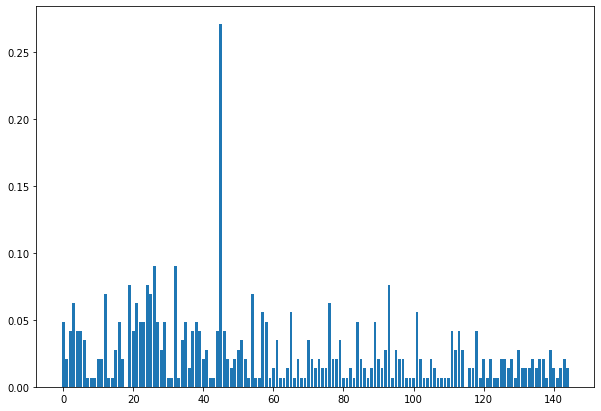

In [67]:
# Plot the distribution of all the degree centralities

x_degree = G1_degree.keys()
y_degree = G1_degree.values()

plt.figure(figsize=(10,7))
plt.bar(range(len(x_degree)), y_degree)

## Closeness centrality

In [68]:
G1_closeness = nx.closeness_centrality(G1)

In [69]:
# Sort the nodes by the keys for better understanding
import collections

G1_closeness = collections.OrderedDict(sorted(G1_closeness.items()))
G1_closeness

OrderedDict([(1, 0.35455764075067026),
             (2, 0.276673640167364),
             (3, 0.21504065040650408),
             (5, 0.21644844517184944),
             (8, 0.29786036036036034),
             (9, 0.3075581395348837),
             (11, 0.2417733089579525),
             (13, 0.3225609756097561),
             (17, 0.320995145631068),
             (19, 0.23324514991181658),
             (22, 0.006944444444444444),
             (23, 0.2417733089579525),
             (25, 0.33997429305912596),
             (26, 0.2795983086680761),
             (27, 0.272680412371134),
             (30, 0.3489445910290238),
             (32, 0.2790084388185654),
             (33, 0.2760960334029227),
             (34, 0.40817901234567905),
             (35, 0.294543429844098),
             (36, 0.26880081300813014),
             (37, 0.2825854700854701),
             (39, 0.37253521126760564),
             (40, 0.3564690026954178),
             (42, 0.28563714902807774),
             (43, 0.006

<BarContainer object of 145 artists>

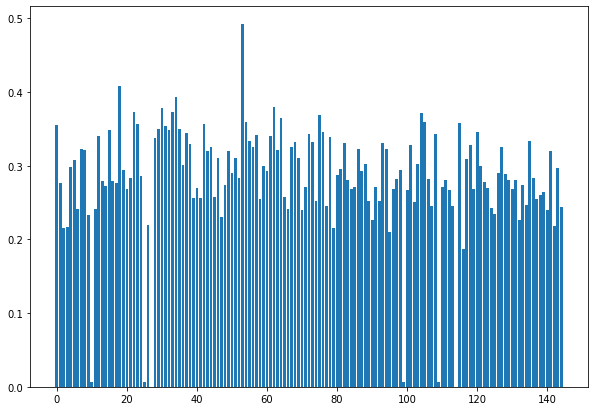

In [70]:
# Plot the distribution for the closeness centrality
x_closeness = G1_closeness.keys()
y_closeness = G1_closeness.values()

plt.figure(figsize=(10,7))
plt.bar(range(len(x_closeness)), y_closeness)

### Plot the Probability Density Function for the closeness centrality of the graph

In [72]:
# Sort the closeness centrality values 
v_sorted = sorted(G1_closeness.values())

In [73]:
max_v = max(v_sorted)
min_v = min(v_sorted)

print(f"min_v: {min_v}\nmax_v: {max_v}")

min_v: 0.0
max_v: 0.491635687732342


In [74]:
# Define the interval
S = max_v - min_v
n = 25 # bin size
dx = S / n
print(f"S: {S}m n: {n}, dx: {dx}")

S: 0.491635687732342m n: 25, dx: 0.01966542750929368


In [84]:
f = np.zeros(n)
f_zeros = len(v_sorted)

In [75]:
intervals = np.linspace(0*dx, n*dx, n)
intervals

array([0.        , 0.02048482, 0.04096964, 0.06145446, 0.08193928,
       0.1024241 , 0.12290892, 0.14339374, 0.16387856, 0.18436338,
       0.2048482 , 0.22533302, 0.24581784, 0.26630266, 0.28678748,
       0.3072723 , 0.32775713, 0.34824195, 0.36872677, 0.38921159,
       0.40969641, 0.43018123, 0.45066605, 0.47115087, 0.49163569])

In [76]:
nest = []

for k in range(1, n):
    if k == 1:
        x = [i for i in v_sorted if i >= intervals[k-1] and i < intervals[k]]
        nest.append(x)
    if k+1 == n:
        x = [i for i in v_sorted if i >= intervals[-2] and i <= intervals[-1]]
        nest.append(x)
    else:
        x = [i for i in v_sorted if i >=intervals[k] and i < intervals[k+1]]
        nest.append(x)

In [85]:
for i in range(len(nest)):
    f[i] = len(nest[i])

In [86]:
f = f / sum(f)

In [87]:
f

array([0.04137931, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00689655,
       0.04137931, 0.10344828, 0.08965517, 0.2137931 , 0.11034483,
       0.11724138, 0.13793103, 0.08275862, 0.03448276, 0.0137931 ,
       0.        , 0.        , 0.        , 0.        , 0.00689655])

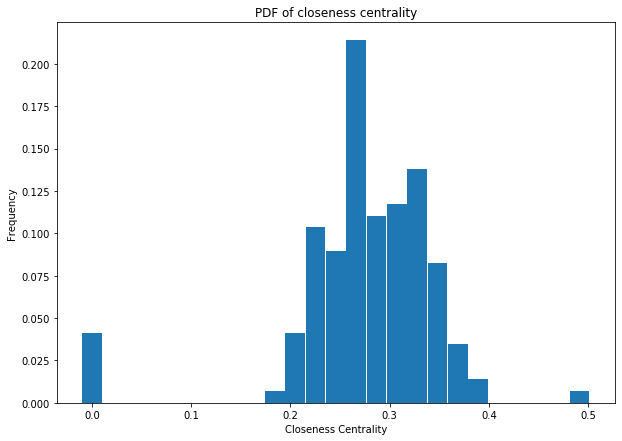

In [88]:
plt.figure(figsize=(10,7))
plt.bar(intervals, f, width=dx)

plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.title("PDF of closeness centrality")

plt.show()

So we conclude that the distribution of the Closeness Centrality of G1 follows the normal distribution.

## Betweenes centrality

In [90]:
# Follow the same procedure to find betweenss centrality
G1_bet = nx.betweenness_centrality(G1)
G1_bet = collections.OrderedDict(sorted(G1_bet.items()))

In [92]:
max(G1_bet.items(), key=lambda x: x[1])

(91, 0.44920678236535405)

<BarContainer object of 145 artists>

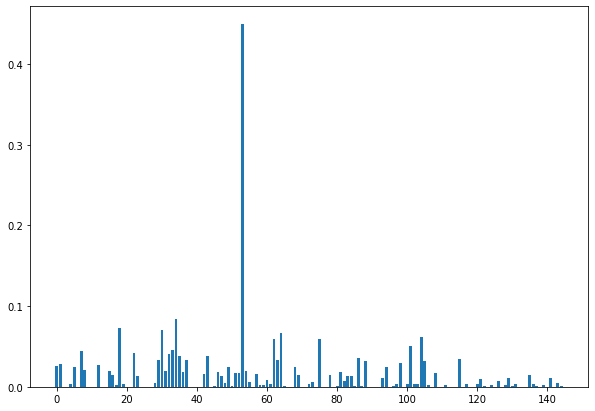

In [93]:
x_bet = G1_bet.keys()
y_bet = G1_bet.values()

plt.figure(figsize=(10,7))
plt.bar(range(len(x_bet)), y_bet)

## Eigenvector Centrality

In [94]:
G1_eig = nx.eigenvector_centrality(G1) 

In [95]:
G1_eig = collections.OrderedDict(sorted(G1_eig.items()))
max(G1_eig.items(), key=lambda x: x[1])

(91, 0.5273995566741563)

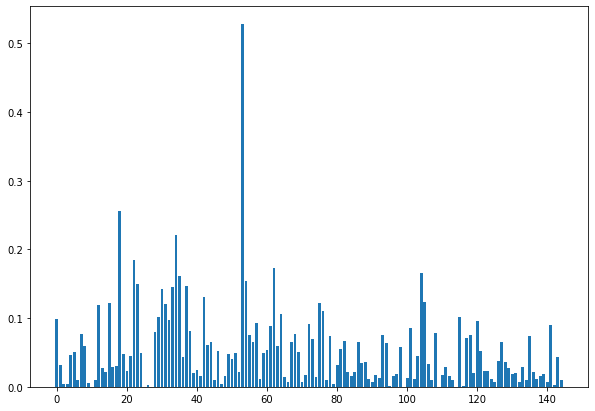

In [97]:
x_eig = G1_eig.keys()
y_eig = G1_eig.values()

plt.figure(figsize=(10,7))
plt.bar(range(len(x_eig)), y_eig)

plt.show()

## Katz Centrality

In [98]:
G1_katz = nx.katz_centrality(G1)
G1_katz = collections.OrderedDict(sorted(G1_katz.items())) 
max(G1_katz.items(), key=lambda x: x[1])

(91, 0.4378089965795698)

<BarContainer object of 145 artists>

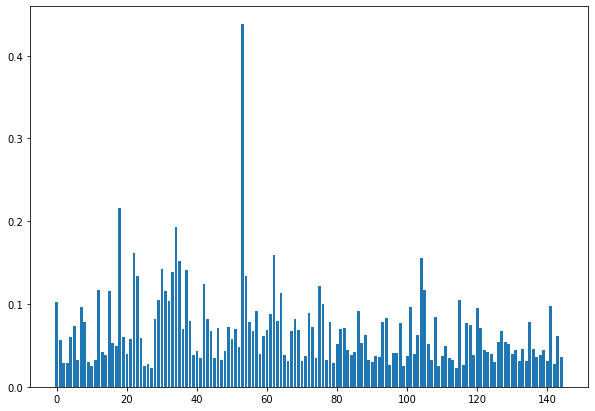

In [99]:
x_katz = G1_katz.keys()
y_katz = G1_katz.values()

plt.figure(figsize=(10,7))
plt.bar(range(len(x_katz)), y_katz)

## Create the next subgraph

In [100]:
G2 = nx.from_pandas_edgelist(data.iloc[sub_graphs[1]:sub_graphs[2]], 'source_id', 'target_id', ['timestamp'])
G2.remove_edges_from(nx.selfloop_edges(G2))
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 161
Number of edges: 297
Average degree:   3.6894


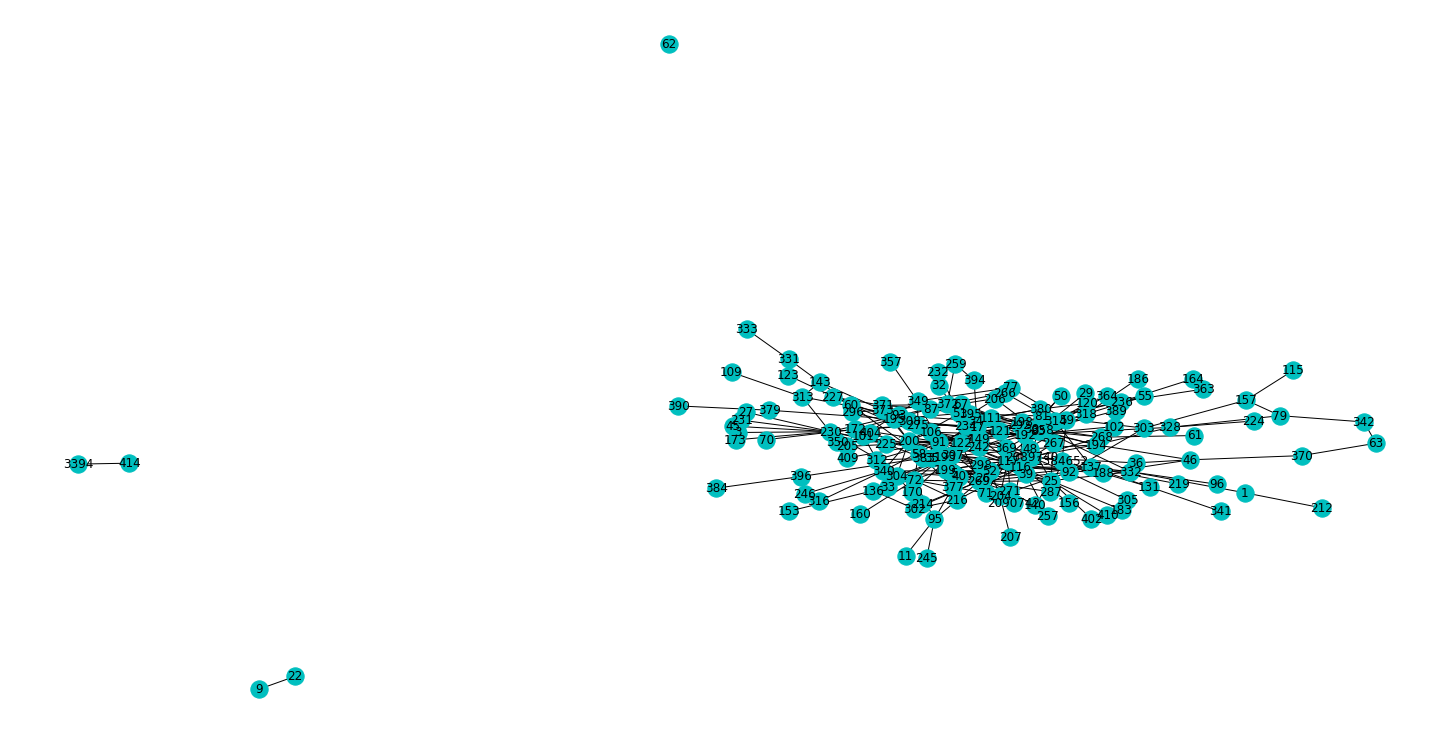

In [101]:
plt.figure(figsize=(20,10))
nx.draw(G2, node_size=300, node_color='c', with_labels=True)

In [104]:
# Find the earliest and latest timestamp
G2_timestamps = [d['timestamp'] for _,_,d in G2.edges(data=True)]

G2_min = min(G2_timestamps)
G2_max = max(G2_timestamps)

print(f"min: {G2_min}, max: {G2_max}")

min: 1217883734, max: 1217974758


In [105]:
# Verify that the min timestamp of G2 is right after max timestamp of G1
print(f"G1_max: {G1_max}, G2_min: {G2_min}")

G1_max: 1217883604, G2_min: 1217883734


# Evolution